<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/SBERT_CROSS_ENCODER_for_Zero_Shot_Classification%2C_Question_%26_Answer_(QA)%2C_Update_2022_(SBERT_27).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.5 MB/s eta 0:00:00


In [2]:
!pip install sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.5 MB/s eta 0:00:00


In [3]:
from sentence_transformers import CrossEncoder
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
document = """Europe is a large peninsula[10] conventionally considered a continent in its own right because of its great physical size and the weight of its history and traditions. Europe is also considered a subcontinent of Eurasia and it is located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere. Comprising the westernmost peninsulas of Eurasia,[11] it shares the continental landmass of Afro-Eurasia with both Africa and Asia. It is bordered by the Arctic Ocean to the north, the Atlantic Ocean to the west, the Mediterranean Sea to the south and Asia to the east. Europe is commonly considered to be separated from Asia by the watershed of the Ural Mountains, the Ural River, the Caspian Sea, the Greater Caucasus, the Black Sea and the waterways of the Turkish Straits.[12]

Europe covers about 10.18 million km2 (3.93 million sq mi), or 2% of Earth's surface (6.8% of land area), making it the second-smallest continent (using the seven-continent model). Politically, Europe is divided into about fifty sovereign states, of which Russia is the largest and most populous, spanning 39% of the continent and comprising 15% of its population. Europe had a total population of about 745 million (about 10% of the world population) in 2021.[2][3] The European climate is largely affected by warm Atlantic currents that temper winters and summers on much of the continent, even at latitudes along which the climate in Asia and North America is severe. Further from the sea, seasonal differences are more noticeable than close to the coast.European culture is the root of Western civilisation, which traces its lineage back to ancient Greece and ancient Rome.[13][14] The fall of the Western Roman Empire in 476 AD and the subsequent Migration Period marked the end of Europe's ancient history, and the beginning of the Middle Ages. Renaissance humanism, exploration, art, and science led to the modern era. Since the Age of Discovery, started by Portugal and Spain, Europe played a predominant role in global affairs. Between the 16th and 20th centuries, European powers colonised at various times the Americas, almost all of Africa and Oceania, and the majority of Asia.

The Age of Enlightenment, the subsequent French Revolution and the Napoleonic Wars shaped the continent culturally, politically and economically from the end of the 17th century until the first half of the 19th century. The Industrial Revolution, which began in Great Britain at the end of the 18th century, gave rise to radical economic, cultural and social change in Western Europe and eventually the wider world. Both world wars took place for the most part in Europe, contributing to a decline in Western European dominance in world affairs by the mid-20th century as the Soviet Union and the United States took prominence.[15] During the Cold War, Europe was divided along the Iron Curtain between NATO in the West and the Warsaw Pact in the East, until the Revolutions of 1989, Fall of the Berlin Wall and the Dissolution of the Soviet Union.

In 1949, the Council of Europe was founded with the idea of unifying Europe[16] to achieve common goals and prevent future wars. Further European integration by some states led to the formation of the European Union (EU), a separate political entity that lies between a confederation and a federation.[17] The EU originated in Western Europe but has been expanding eastward since the fall of the Soviet Union in 1991. The currency of most countries of the European Union, the euro, is the most commonly used among Europeans; and the EU's Schengen Area abolishes border and immigration controls between most of its member states, and some non-member states. There exists a political movement favouring the evolution of the European Union into a single federation encompassing much of the continent."""

In [5]:
document

"Europe is a large peninsula[10] conventionally considered a continent in its own right because of its great physical size and the weight of its history and traditions. Europe is also considered a subcontinent of Eurasia and it is located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere. Comprising the westernmost peninsulas of Eurasia,[11] it shares the continental landmass of Afro-Eurasia with both Africa and Asia. It is bordered by the Arctic Ocean to the north, the Atlantic Ocean to the west, the Mediterranean Sea to the south and Asia to the east. Europe is commonly considered to be separated from Asia by the watershed of the Ural Mountains, the Ural River, the Caspian Sea, the Greater Caucasus, the Black Sea and the waterways of the Turkish Straits.[12]\n\nEurope covers about 10.18 million km2 (3.93 million sq mi), or 2% of Earth's surface (6.8% of land area), making it the second-smallest continent (using the seven-continent model). Politically, Europe is

In [6]:
#split the article into paragraphs and then paragraph into sentences
paragraphs = []
for paragraph in document.replace("\r\n","\n").split("\n\n"):
  if len(paragraph.strip())> 0:
    paragraphs.append(sent_tokenize(paragraph.strip()))

In [7]:
paragraphs

[['Europe is a large peninsula[10] conventionally considered a continent in its own right because of its great physical size and the weight of its history and traditions.',
  'Europe is also considered a subcontinent of Eurasia and it is located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere.',
  'Comprising the westernmost peninsulas of Eurasia,[11] it shares the continental landmass of Afro-Eurasia with both Africa and Asia.',
  'It is bordered by the Arctic Ocean to the north, the Atlantic Ocean to the west, the Mediterranean Sea to the south and Asia to the east.',
  'Europe is commonly considered to be separated from Asia by the watershed of the Ural Mountains, the Ural River, the Caspian Sea, the Greater Caucasus, the Black Sea and the waterways of the Turkish Straits.',
  '[12]'],
 ["Europe covers about 10.18 million km2 (3.93 million sq mi), or 2% of Earth's surface (6.8% of land area), making it the second-smallest continent (using the seven-continent

In [8]:
#combine upto 3 sentences
window_size = 3
passages = []
for paragraph in paragraphs:
  for start_idx in range(0,len(paragraph),window_size):
    end_idx = min(start_idx + window_size,len(paragraph))
    passages.append(" ".join(paragraph[start_idx:end_idx]))

In [9]:
print(f"Paragraphs : {len(paragraphs)}")
print(f"Sentences : {sum([len(p) for p in paragraphs])}")
print(f"Passages : {len(passages)}")

Paragraphs : 4
Sentences : 24
Passages : 9


In [10]:
model = CrossEncoder('cross-encoder/ms-marco-TinyBERT-L-2')

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [11]:
queries = ['How large is Europe?','Is Europe a continent?',
           'What is the currency in EU?',
           'Is Europa in Southern part of the globe?']

In [12]:
import time
for query in queries:
  start_time = time.time()
  model_inputs = [(query,passage) for passage in passages]
  scores = model.predict(model_inputs)
  results = [{'input':inp,'score':score} for inp,score in zip(model_inputs,scores)]
  results = sorted(results,key=lambda x:x['score'],reverse=True)
  print(f"query :{query}")
  print(f"search took {time.time() - start_time:.2f} seconds")
  for hit in results[:5]:
    print(f"Score : {hit['score']} \t {hit['input'][1]}")

query :How large is Europe?
search took 10.00 seconds
Score : 0.9298860430717468 	 Europe is a large peninsula[10] conventionally considered a continent in its own right because of its great physical size and the weight of its history and traditions. Europe is also considered a subcontinent of Eurasia and it is located entirely in the Northern Hemisphere and mostly in the Eastern Hemisphere. Comprising the westernmost peninsulas of Eurasia,[11] it shares the continental landmass of Afro-Eurasia with both Africa and Asia.
Score : 0.8595547676086426 	 Europe covers about 10.18 million km2 (3.93 million sq mi), or 2% of Earth's surface (6.8% of land area), making it the second-smallest continent (using the seven-continent model). Politically, Europe is divided into about fifty sovereign states, of which Russia is the largest and most populous, spanning 39% of the continent and comprising 15% of its population. Europe had a total population of about 745 million (about 10% of the world popu

##Zero Shot Classification

In [13]:
from transformers import pipeline
classifier = pipeline('zero-shot-classification',model='cross-encoder/nli-deberta-base')

Downloading:   0%|          | 0.00/975 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/557M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778 [00:00<?, ?B/s]

In [14]:
Sent = "Apple just announced the launch of new Iphone 14"
candidate_labels = ["technology","religion","politics","phone","tablet","computer"]
res = classifier(Sent,candidate_labels)
print(res['scores'])

[0.38750195503234863, 0.3342079520225525, 0.1816428303718567, 0.09369941800832748, 0.0017643111059442163, 0.00118354894220829]


In [15]:
print(res['labels'])

['technology', 'phone', 'computer', 'tablet', 'religion', 'politics']


In [16]:
sent1 = "Jupiter is the smallest planet in our solar system"
candidate_labels = ["sports","politics","alchemy","science","astrology"]
res = classifier(Sent,candidate_labels)
for label,score in zip(res['labels'],res['scores']):
  print(f"{label}:{score}")

sports:0.24760477244853973
science:0.24625509977340698
alchemy:0.2289862036705017
astrology:0.17707237601280212
politics:0.10008155554533005


## Same model for sentence pair similarity

In [17]:
from sentence_transformers import CrossEncoder
model = CrossEncoder('cross-encoder/nli-deberta-base')

In [18]:
scores = model.predict([('A man is eating pizza','A man eats something')])

In [19]:
scores

array([[-4.4271946 ,  3.096611  ,  0.50673735]], dtype=float32)

In [20]:
#convert scores to labels
labels = ['contradiction','entailment','neutral']
label = [labels[score] for score in scores.argmax(axis=1)]
label

['entailment']

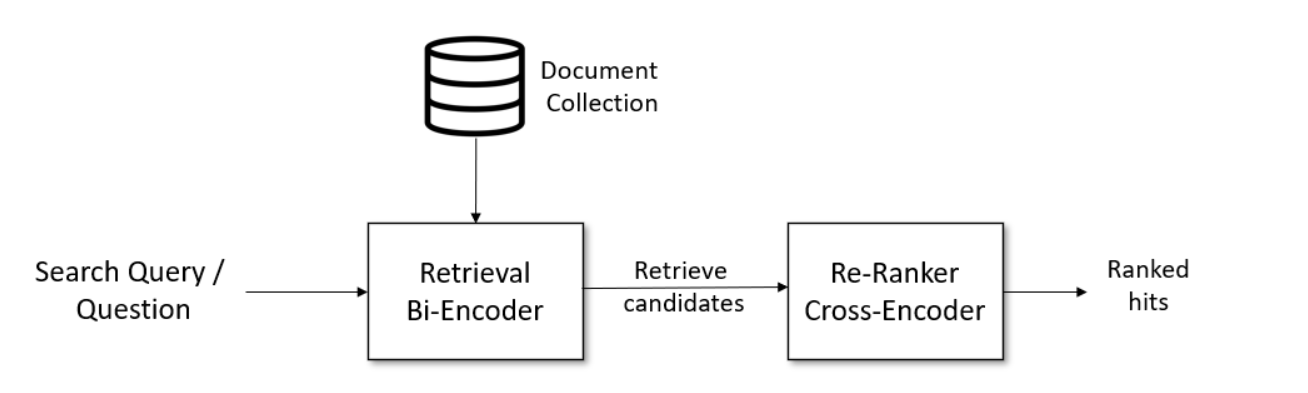

## Advanced Semantic SEARCH w/ SBERT (Re-Ranking w/ Cross-Encoder) Edition 2022 #sbert (SBERT 28)
* How to perform reranking with a cross-encoder for semantic search

In [21]:
from sentence_transformers import SentenceTransformer, util
from sentence_transformers import CrossEncoder
import os
import csv
import pickle
import time
import sys

##BiEncoder

In [22]:
# We use a BiEncoder (SentenceTransformer) that produces embeddings for questions.
# We then search for similar questions using cosine similarity and identify the top 100 most similar questions
model_name = 'all-MiniLM-L6-v2'
model = SentenceTransformer(model_name)
num_candidates = 500

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

##Cross-Encoder

In [24]:
# To refine the results, we use a CrossEncoder. 
#A CrossEncoder gets both inputs (input_question, retrieved_question)
# and outputs a score 0...1 indicating the similarity.
cross_encoder_model = CrossEncoder('cross-encoder/stsb-roberta-base')

Downloading:   0%|          | 0.00/608 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/142 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

##Dataset

In [25]:
# Dataset we want to use
url = "http://qim.fs.quoracdn.net/quora_duplicate_questions.tsv"
dataset_path = "quora_duplicate_questions.tsv"
max_corpus_size = 20000

In [26]:
# Some local file to cache computed embeddings
embedding_cache_path = 'quora-embeddings-{}-size-{}.pkl'.format(model_name.replace('/', '_'), max_corpus_size)

In [27]:
embedding_cache_path 

'quora-embeddings-all-MiniLM-L6-v2-size-20000.pkl'

* Cross-Encoders have their own evaluation function : sentence_transformers.cross_encoder.evaluation

In [32]:
import pandas as pd
#Check if embedding cache path exists
if not os.path.exists(embedding_cache_path):
  # Check if the dataset exists. If not, download and extract
  # Download dataset if needed
  if not os.path.exists(dataset_path):
    print("Download dataset")
    util.http_get(url, dataset_path)
  # Get all unique sentences from the file
  corpus_sentences = set()
  df = pd.read_csv(dataset_path,sep = '\t')
  df = df.head(max_corpus_size)
  print(df.head())
  quest1 = list(df['question1'])
  quest2 = list(df['question2'])
  for q1,q2 in zip(quest1,quest2):
    corpus_sentences.add(q1)
    corpus_sentences.add(q2)
  corpus_sentences = list(corpus_sentences)
  print("Encode the corpus. This might take a while")
  corpus_embeddings = model.encode(corpus_sentences, show_progress_bar=True, convert_to_tensor=True)
  #
  print("Store file on disc")
  with open(embedding_cache_path, "wb") as fOut:
    pickle.dump({'sentences': corpus_sentences, 'embeddings': corpus_embeddings}, fOut)
else:
    print("Load pre-computed embeddings from disc")
    with open(embedding_cache_path, "rb") as fIn:
        cache_data = pickle.load(fIn)
        corpus_sentences = cache_data['sentences'][0:max_corpus_size]
        corpus_embeddings = cache_data['embeddings'][0:max_corpus_size]

###############################
print("Corpus loaded with {} sentences / embeddings".format(len(corpus_sentences)))

   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0  
Encode the corpus. This might take a while


Batches:   0%|          | 0/1181 [00:00<?, ?it/s]

Store file on disc
Corpus loaded with 37766 sentences / embeddings


In [34]:
option = 'yes'
while option == 'yes':
    inp_question = input("Please enter a question: ")
    print("Input question:", inp_question)

    #First, retrieve candidates using cosine similarity search
    start_time = time.time()
    #bi-encoder
    question_embedding = model.encode(inp_question, convert_to_tensor=True)
    hits = util.semantic_search(question_embedding, corpus_embeddings, top_k=num_candidates)
    hits = hits[0]  #Get the hits for the first query

    print("Cosine-Similarity search took {:.3f} seconds".format(time.time()-start_time))
    print("Top 5 hits with cosine-similarity:")
    for hit in hits[0:5]:
        print("\t{:.3f}\t{}".format(hit['score'], corpus_sentences[hit['corpus_id']]))


    #Now, do the re-ranking with the cross-encoder
    start_time = time.time()
    sentence_pairs = [[inp_question, corpus_sentences[hit['corpus_id']]] for hit in hits]
    #cross-encoder to predict the sentence pair similarity score
    ce_scores = cross_encoder_model.predict(sentence_pairs)

    for idx in range(len(hits)):
        hits[idx]['cross-encoder_score'] = ce_scores[idx]

    #Sort list by CrossEncoder scores
    hits = sorted(hits, key=lambda x: x['cross-encoder_score'], reverse=True)
    print("\nRe-ranking with Cross-Encoder took {:.3f} seconds".format(time.time() - start_time))
    print("Top 5 hits with CrossEncoder:")
    for hit in hits[0:5]:
        print("\t{:.3f}\t{}".format(hit['cross-encoder_score'], corpus_sentences[hit['corpus_id']]))

    print("\n\n========\n")
    option = input("Do you want to continue? (yes/no)")

Please enter a question: what is time?
Input question: what is time?
Cosine-Similarity search took 0.013 seconds
Top 5 hits with cosine-similarity:
	0.779	How does time exist?
	0.735	Why does time exist?
	0.703	Why was time created?
	0.696	Who, why, and when was time created?
	0.671	What is the speed of time? Can we define it?

Re-ranking with Cross-Encoder took 1.350 seconds
Top 5 hits with CrossEncoder:
	0.779	What is SIN time?
	0.725	How does time exist?
	0.698	What is time dilation?
	0.627	What is the meaning of time dilation?
	0.625	Is it rude to call people at dinner time?  If so, what time is dinner time?



Do you want to continue? (yes/no)yes
Please enter a question: Does suagr quickly dissolve in water ?
Input question: Does suagr quickly dissolve in water ?
Cosine-Similarity search took 0.013 seconds
Top 5 hits with cosine-similarity:
	0.627	Can water dissolve in fat?
	0.598	How do I dissolve sugar in cold water?
	0.546	Which one dissolve in water quikly sugar, salt, methane